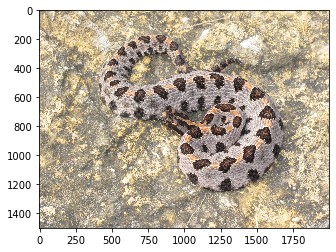

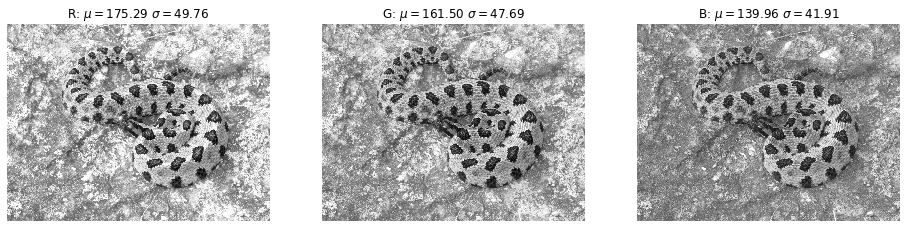

In [61]:
%matplotlib inline

import time
import numpy as np
import cv2

import medpy

from skimage import io
from skimage import filters
from skimage import exposure
from skimage.morphology import disk

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from medpy.filter.smoothing import anisotropic_diffusion

def normalize(img):
    img -= np.min(img)
    img /= np.max(img)
    img *= 255.0
    return img.astype(np.uint8)

img_source = io.imread('test_images_small/0fd49e1a4d.jpg')

fig=plt.figure()
plt.imshow(img_source)

channels = ['R', 'G', 'B']

fig=plt.figure(figsize=(16, 8), facecolor='w', edgecolor='k')

for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    ax.title.set_text(str(channels[i]) 
                      + ": $\mu = {:.2f}$".format(np.mean(img_source[:,:,i])) 
                      + " $\sigma = {:.2f}$".format(np.std(img_source[:,:,i])))
    plt.imshow(img_source[:,:,i], cmap='gray')
    ax.axis('off')
    


Elapsed 11.30 s
Elapsed 14.56 s
Elapsed 18.54 s


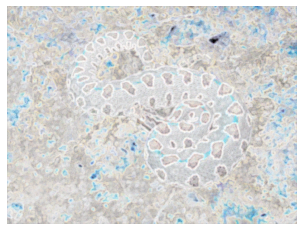

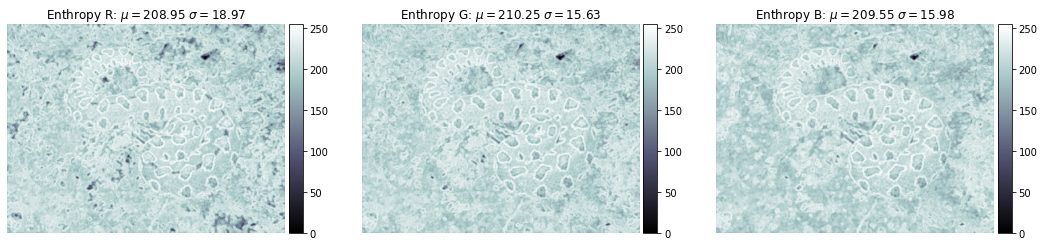

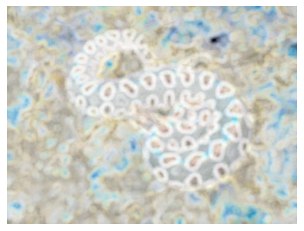

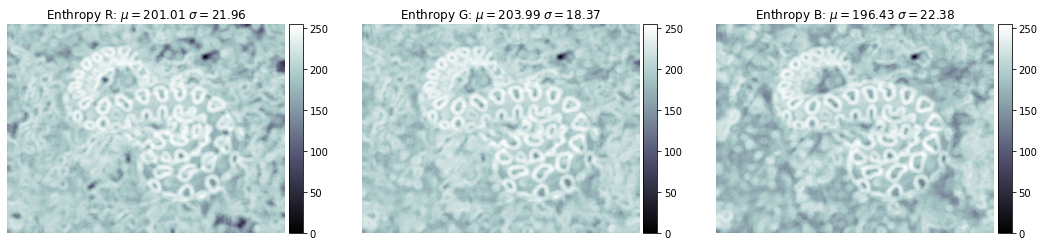

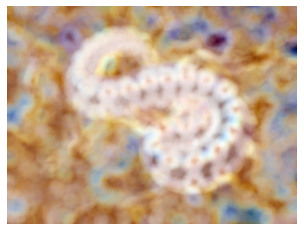

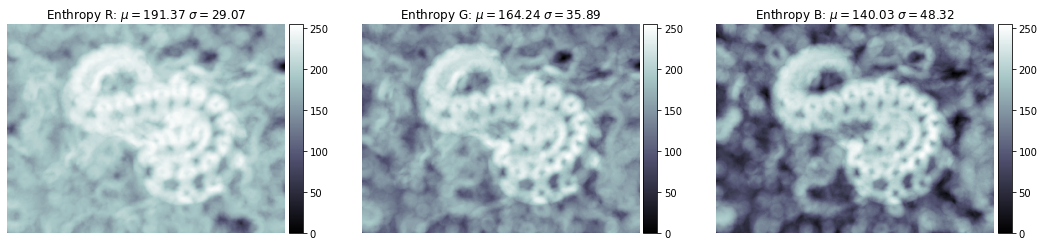

In [32]:
# Enthropy

kernel_size = np.array([10,25,50])

for k in range(len(kernel_size)):
    img_enthropy = np.zeros(img_source.shape)

    start = time.time()
    for i in range(3):
        img_enthropy[:,:,i] = normalize(filters.rank.entropy(img_source[:,:,i], 
                                                             disk(kernel_size[k])))
    img_enthropy = img_enthropy.astype(np.uint8)
    print ("Elapsed {:.2f}".format(time.time() - start), 's')

    fig, ax = plt.subplots()
    divider = make_axes_locatable(ax)
    im = ax.imshow(img_enthropy, cmap='bone')
    plt.axis('off')

    fig=plt.figure(figsize=(18, 8), facecolor='w', edgecolor='k')
    for i in range(3):
        ax = plt.subplot(1, 3, i+1)
        ax.axis('off')
        ax.title.set_text("Enthropy " + str(channels[i]) 
                          + ": $\mu = {:.2f}$".format(np.mean(img_enthropy[:,:,i])) 
                          + " $\sigma = {:.2f}$".format(np.std(img_enthropy[:,:,i])))
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('right', size='5%', pad=0.05)
        im = ax.imshow(img_enthropy[:,:,i], cmap='bone')
        
        fig.colorbar(im, cax=cax, orientation='vertical')
        
        

Elapsed 0.42 s


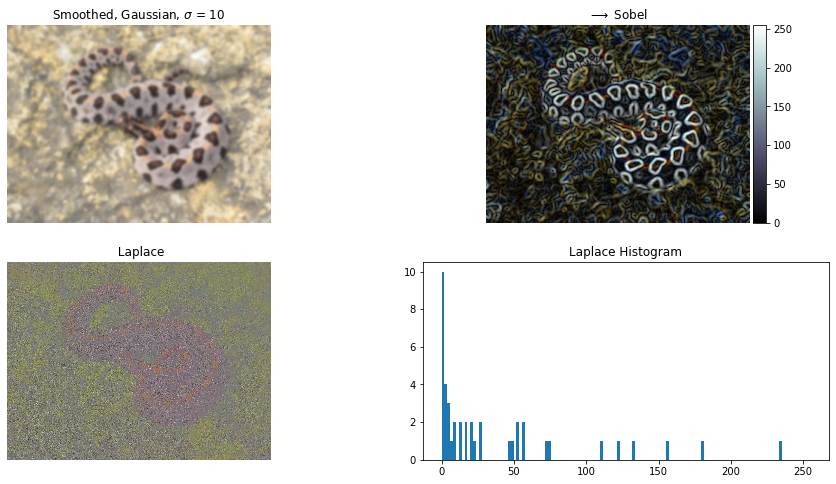

In [52]:
# Energy (Sobel)

sigma = 10
img_sobel = np.zeros(img_source.shape)
img_gaussian = filters.gaussian(img_source, sigma,  multichannel=True)
img_laplace =  filters.laplace(img_source, ksize=10, mask=None)
img_laplace = normalize(img_laplace)

x, bins = np.histogram(img_laplace, bins=128)

start = time.time()
for i in range(3):
    img_sobel[:,:,i] = normalize(filters.sobel(img_gaussian[:,:,i]))
img_sobel = img_sobel.astype(np.uint8)
print ("Elapsed {:.2f}".format(time.time() - start), 's')

# Plot
fig=plt.figure(figsize=(16, 8), facecolor='w', edgecolor='k')

ax = plt.subplot(2, 2, 1)
ax.title.set_text("Smoothed, Gaussian, $\sigma$ = " + str(sigma))

plt.imshow(img_gaussian, cmap='gray')
ax.axis('off')

ax = plt.subplot(2, 2, 2)
ax.axis('off')
ax.title.set_text(r"$\longrightarrow$ Sobel")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
im = ax.imshow(img_sobel, cmap='bone')
fig.colorbar(im, cax=cax, orientation='vertical')

ax = plt.subplot(2, 2, 3)
ax.title.set_text(r" Laplace")
plt.imshow(img_laplace, cmap='gray')
ax.axis('off')

ax = plt.subplot(2, 2, 4)
h = plt.hist(x, bins)
ax.title.set_text(r"Laplace Histogram")

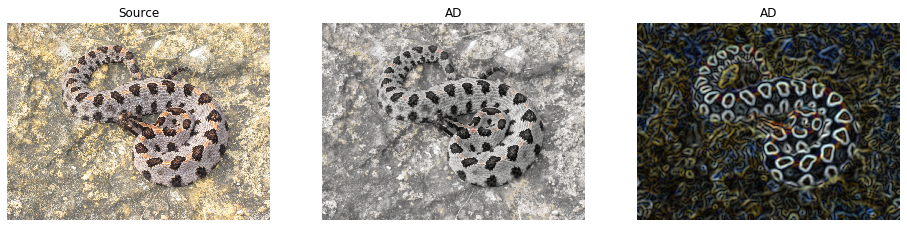

In [80]:
# Anisothropic diffusion

img_ad = normalize(anisotropic_diffusion(img_source, niter=10, kappa=50, gamma=0.2))
img_sobel_2 = np.zeros(img_source.shape)

# Sobel after
for i in range(3):
    img_sobel_2[:,:,i] = normalize(filters.sobel(img_ad[:,:,i]))
img_sobel_2 = img_sobel.astype(np.uint8)

fig=plt.figure(figsize=(16, 8), facecolor='w', edgecolor='k')

ax = plt.subplot(1, 3, 1)
ax.axis('off')
ax.title.set_text(r"Source")
im = ax.imshow(img_source)

ax = plt.subplot(1, 3, 2)
ax.axis('off')
ax.title.set_text(r"AD")
im = ax.imshow(img_ad)

ax = plt.subplot(1, 3, 3)
ax.axis('off')
ax.title.set_text(r"AD")
im = ax.imshow(img_sobel_2)
